In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#load the dataset
data = pd.read_csv(r'C:\Users\priya\OneDrive\Desktop\greenAI\day-8\naive_bayes\ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [49]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [50]:
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 1, 'at risk': 0, 'degraded': 2})

In [51]:
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,2
1,95.071431,99.873629,0.184512,45.929245,4.021498,2
2,73.199394,52.846174,0.346640,96.449852,4.194976,2
3,59.865848,182.180001,0.663281,21.897845,4.493691,2
4,15.601864,142.987248,0.482089,58.785642,4.620093,2
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,2
9996,89.750884,14.044187,0.747824,76.452694,4.744065,0
9997,94.670792,91.109541,0.019456,26.956943,7.619473,2
9998,39.748799,132.996002,0.401005,43.431977,6.365560,2


In [52]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [ ]:
#prompt user to enter the values for the features and predict the ecosystem health
def predict_ecosystem_health():
    print("Enter the following values to predict ecosystem health:")
    wq = float(input("Water Quality (0-100): "))
    aq = float(input("Air Quality Index (0-300): "))
    bi = float(input("Biodiversity Index (0-1): "))
    vc = float(input("Vegetation Cover (%): "))
    sp = float(input("Soil pH (0-14): "))

    input_data = np.array([[wq, aq, bi, vc, sp]])
    prediction = model.predict(input_data)
    
    health_status = {1: 'healthy', 0: 'at risk', 2: 'degraded'}
    print(f'Predicted Ecosystem Health: {health_status[prediction[0]]}')



In [57]:
# Call the function to predict ecosystem health
predict_ecosystem_health()


Enter the following values to predict ecosystem health:
Predicted Ecosystem Health: degraded


c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


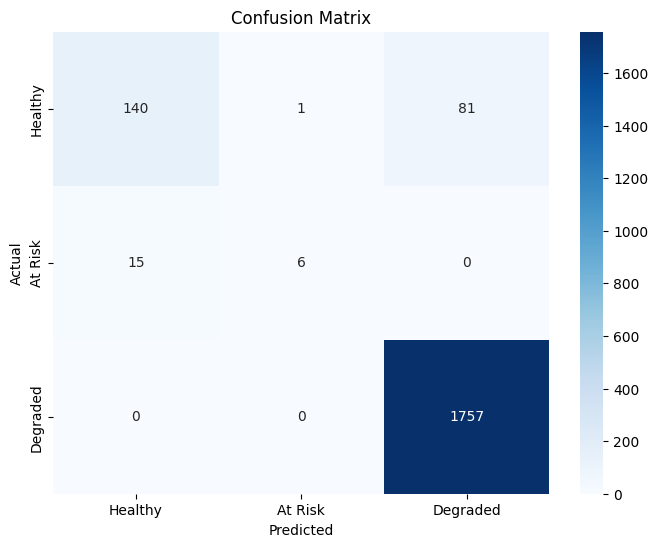

In [58]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'At Risk', 'Degraded'], yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
import joblib as jb
jb.dump(model, 'ecosystem_health_model.pkl')

['ecosystem_health_model.pkl']

In [ ]:
import streamlit as st
st.title("Ecosystem Health Prediction")
st.write("Enter the following values to predict ecosystem health:")
wq = st.number_input("Water Quality (0-100)", min_value=0.0, max_value=100.0, step=1.0)
aq = st.number_input("Air Quality Index (0-300)", min_value=0.0, max_value=300.0, step=1.0)
bi = st.number_input("Biodiversity Index (0-1)", min_value=0.0, max_value=1.0, step=0.01)
vc = st.number_input("Vegetation Cover (%)", min_value=0.0, max_value=100.0, step=1.0)
sp = st.number_input("Soil pH (0-14)", min_value=0.0, max_value=14.0, step=0.1)
if st.button("Predict Ecosystem Health"):
    input_data = np.array([[wq, aq, bi, vc, sp]])
    prediction = model.predict(input_data)
    
    health_status = {1: 'healthy', 0: 'at risk', 2: 'degraded'}
    st.write(f'Predicted Ecosystem Health: {health_status[prediction[0]]}')